In [5]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing

from tensorflow import keras
from keras.utils import to_categorical


In [9]:
# Importing and cleaning the data
data = pd.read_csv('./data.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,2,1,1,6,10,1,0,...,0,0.000000,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,11,1,1,4,4,1,0,...,6,14.000000,0,6,6,6,13.666667,0,0.79,2
2,1,1,5,5,1,1,10,10,1,0,...,0,0.000000,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,15,1,1,6,4,1,0,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,2
4,2,12,1,3,0,1,10,10,0,0,...,5,12.333333,0,6,6,6,13.000000,0,0.79,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [11]:
X = data.drop('Target', axis=1)
y = data['Target']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((3539, 26), (885, 26))

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Keras model
model = Sequential()

# Input layer with 26 input features
model.add(Dense(26, activation='relu', kernel_initializer='random_normal', input_dim=26))

# Hidden layers
model.add(Dense(13, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='random_normal'))

# Output layer with 3 classes and softmax activation
model.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
              metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 26)                702       
                                                                 
 dense_20 (Dense)            (None, 13)                351       
                                                                 
 dense_21 (Dense)            (None, 7)                 98        
                                                                 
 dense_22 (Dense)            (None, 5)                 40        
                                                                 
 dense_23 (Dense)            (None, 3)                 18        
                                                                 
Total params: 1209 (4.72 KB)
Trainable params: 1209 (4.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
45/45 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.9142 - val_loss: 1.5692 - val_accuracy: 0.7401
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9152 - val_loss: 1.5245 - val_accuracy: 0.7373
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.9159 - val_loss: 1.4879 - val_accuracy: 0.7345
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.9166 - val_loss: 1.5130 - val_accuracy: 0.7415
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.9138 - val_loss: 1.6026 - val_accuracy: 0.7401
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.9022 - val_loss: 1.3464 - val_accuracy: 0.7331
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8912 - val_loss: 1.5022 - val_accuracy: 0.7429
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2601 - accuracy: 0.9241 - val_loss: 1.5514 - val_accuracy: 0.7345
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9181 - val_loss: 1.6121 - val_accuracy: 0.7345
Epoch 61/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.9202 - val_loss: 1.5909 - val_accuracy: 0.7288
Epoch 62/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9205 - val_loss: 1.6696 - val_accuracy: 0.7331
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9209 - val_loss: 1.6642 - val_accuracy: 0.7458
Epoch 64/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.9216 - val_loss: 1.5904 - val_accuracy: 0.7345
Epoch 65/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.9219 - val_loss: 1.6805 - val_accuracy: 0.7345
Epoch 

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

111/111 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.8844
Test Loss: 0.5367331504821777
Test Accuracy: 0.8844306468963623


111/111 [==============================] - 0s 1ms/step


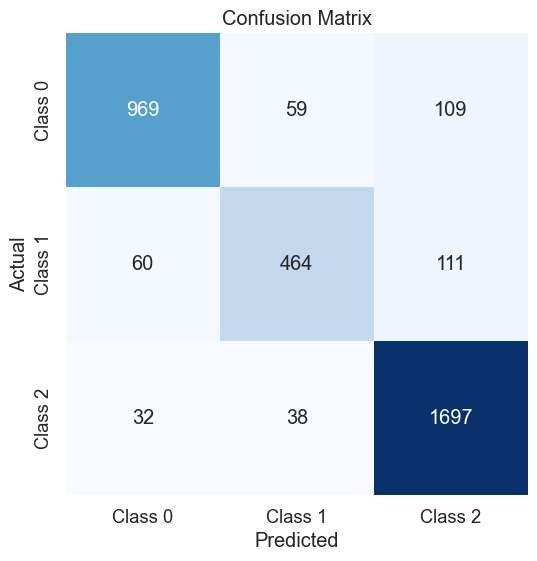

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1137
           1       0.83      0.73      0.78       635
           2       0.89      0.96      0.92      1767

    accuracy                           0.88      3539
   macro avg       0.88      0.85      0.86      3539
weighted avg       0.88      0.88      0.88      3539



In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your test data in `X_test_scaled` and `y_test` and your model named `model`

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels (assuming you want to use a threshold of 0.5)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix for the test data
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Generate a classification report for the test data
class_report = classification_report(y_test, y_pred_classes)
# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)  # Adjust the font scale for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print the classification report
print("Classification Report:\n", class_report)
